# Introduction

At the [2015 SHILAC hackathon](http://shilac.org/), mentors from [MIT Hacking Medicine](http://hackingmedicine.mit.edu/) suggested I look at the [BRFSS](http://www.cdc.gov/brfss/) data on [asthma](https://data.pr.gov/Salud/BRFSS-2012-Asthma/932y-rwhp) published by the government of Puerto Rico. I spent the weekend trying to learn enough scikit-learn to build the tree, and then broke down and did it in R.

It's much easier to do in R.

I did spend a couple of interesting days trying to set up jupyter to run R code. There shouls be support in anaconda, but it's broken (in late November). I did get it to run under docker using the [suggested procedure](https://github.com/IRkernel/IRkernel).

# Methods

We will use the party R package to create the decision trees. You need to run the following code at least once to make sure party is installed.

In [1]:
source("http://bioconductor.org/biocLite.R")
biocLite("party")
library(party)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



The downloaded source packages are in
	‘/tmp/Rtmp9tMAEw/downloaded_packages’


Bioconductor version 3.2 (BiocInstaller 1.20.1), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.2 (BiocInstaller 1.20.1), R 3.2.2 (2015-08-14).
Installing package(s) ‘party’
also installing the dependencies ‘TH.data’, ‘multcomp’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’




The downloaded source packages are in
	‘/tmp/Rtmp9tMAEw/downloaded_packages’


Old packages: 'MASS', 'mgcv', 'spatial'
Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


The data is available on the government of Puerto Rico's data portal. Download a copy if you don't already have it.

In [2]:
download.file("https://data.pr.gov/api/views/932y-rwhp/rows.csv?accessType=DOWNLOAD", "BRFSS_2012_Asthma.csv")

We can read the csv file directly into R. They use a strange encoding for not available.

In [3]:
BRFSS_2012_Asthma <- read.csv("BRFSS_2012_Asthma.csv", na.strings="#N/A")

We also need to remove the rows that are missing the target variable (Asma).

In [4]:
# remove all NA
data <- BRFSS_2012_Asthma[!is.na(BRFSS_2012_Asthma$Asma),]
data[1:5,]

,ID.NUMBER,Asma,EDAD,SEXO,EDUCACION,INGRESO.ANNUAL,ESTADO.MARITAL,EMPLEO,BMI,FUMA,REGION.DE.SALUD
1,988089,No,65<,Male,HSGraduate,<15k,Widowed,Retired,NA,NA,Bayamon
2,988090,No,65<,Female,HS,NA,Widowed,Homemaker,NA,No,Arecibo
3,988091,Yes,55-64,Female,NA,NA,NA,Homemaker,Obese,No,Caguas
4,988092,No,55-64,Female,UniverGrad,15k-<25k,Nevermarried,Outwork,Overweight,No,Arecibo
5,988093,No,35-44,Male,UniverGrad,NA,Married,Employ,Overweight,No,Metro


Now we are ready to build the decision tree. We will use a model that includes all columns.

In [5]:
fit <- ctree(Asma ~ EDAD + SEXO + EDUCACION + INGRESO.ANNUAL + ESTADO.MARITAL + EMPLEO + BMI + FUMA + REGION.DE.SALUD,
            data=data)

# Results

We can plot the tree and see the variables that have the most influence on the condition.

Workaround for issue with svg plots in jupyter (bad interaction with pelican?). See [this gist](http://nbviewer.ipython.org/gist/cfljam/a52f8c47acc7ee6890bb) for discussion.

I _love_ working on the bleeding edge of software development.

In [6]:
options(jupyter.plot_mimetypes = 'image/png')

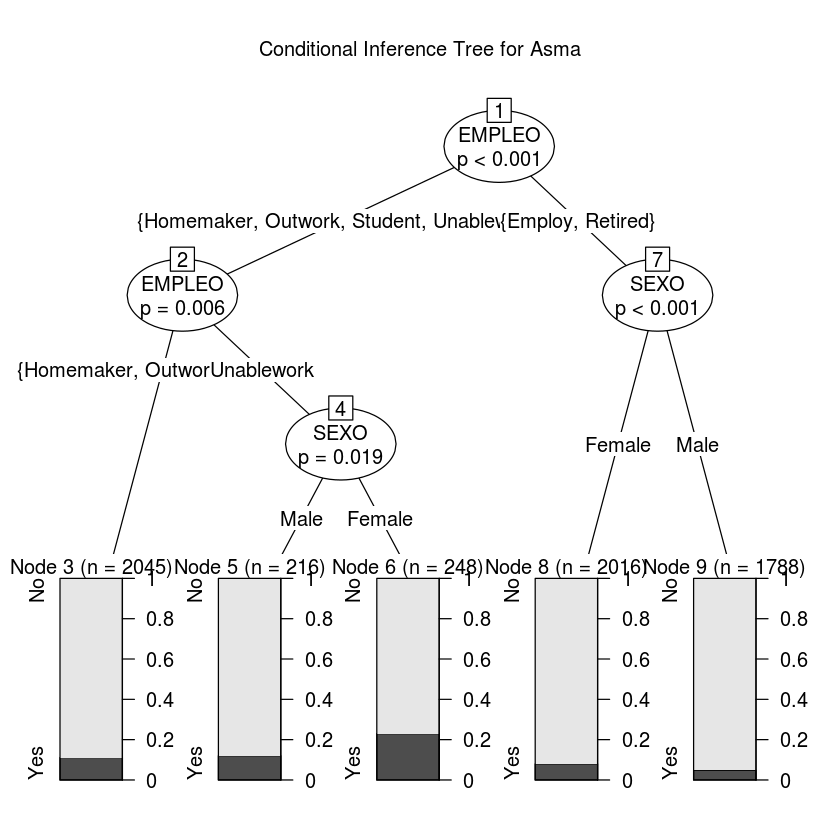

In [7]:
plot(fit, main="Conditional Inference Tree for Asma")